In [1]:
# Numerical/scientific computing packages.
import numpy as np
import scipy
import copy
import pandas as pd
import seaborn as sns
import csv

# Machine learning package.
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt

print('Finished successfully loading packages')

Finished successfully loading packages


In [2]:
# importing my N-number
import random
random.seed(18618637)

In [3]:
df = pd.read_csv("dataSet/musicData.csv")
df.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [4]:
df.dropna(axis=0, how='any', inplace=True)
df.music_genre.value_counts()

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64

In [5]:
print("Unique key values: ", set(df["key"]))
print("Unique mode values: ", set(df["mode"]))
print("Unique music_genre values: ", set(df["music_genre"]))

Unique key values:  {'E', 'B', 'D', 'C', 'F', 'A#', 'G#', 'A', 'C#', 'F#', 'D#', 'G'}
Unique mode values:  {'Minor', 'Major'}
Unique music_genre values:  {'Rock', 'Country', 'Hip-Hop', 'Classical', 'Electronic', 'Alternative', 'Rap', 'Anime', 'Blues', 'Jazz'}


In [6]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer to the data and transform it
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# df_imputed.isna().sum()

In [7]:
def count_values_per_col(df: pd.DataFrame, col_name: str, value_to_count: any):
    count_vals = (df[col_name] == value_to_count).sum()
    return "Number of values equal to {} in '{}' column: {}".format(value_to_count, col_name, count_vals)

count_values_per_col(df, "duration_ms", -1)

"Number of values equal to -1 in 'duration_ms' column: 4939"

In [8]:
mean_duration = df.loc[df['duration_ms'] != -1, 'duration_ms'].mean()
# replace -1 values with the mean
df.loc[df['duration_ms'] == -1, 'duration_ms'] = mean_duration

In [9]:
count_values_per_col(df, "duration_ms", -1)

"Number of values equal to -1 in 'duration_ms' column: 0"

In [10]:
count_values_per_col(df, "tempo", "?")

"Number of values equal to ? in 'tempo' column: 4980"

In [11]:
df['tempo'] = df['tempo'].replace("?", float("NaN"))
df['tempo'] = df['tempo'].astype(float)
mean_tempo = df.loc[~df['tempo'].isna(), 'tempo'].mean()
df['tempo'] = df['tempo'].replace(float("NaN"), mean_tempo)
############################################################
df['popularity'] = df['popularity'] / 100
mean_popularity = df.loc[~df['popularity'].isna(), 'popularity'].mean()
df['popularity'] = df['popularity'].replace(float("NaN"), mean_popularity)

In [12]:
count_values_per_col(df, "tempo", "?")

"Number of values equal to ? in 'tempo' column: 0"

In [13]:
df.reset_index()
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,0.27,0.00468,0.652,245503.541466,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,0.31,0.01270,0.622,218293.000000,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,0.28,0.00306,0.620,215613.000000,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,0.34,0.02540,0.774,166875.000000,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,0.32,0.00465,0.638,222369.000000,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


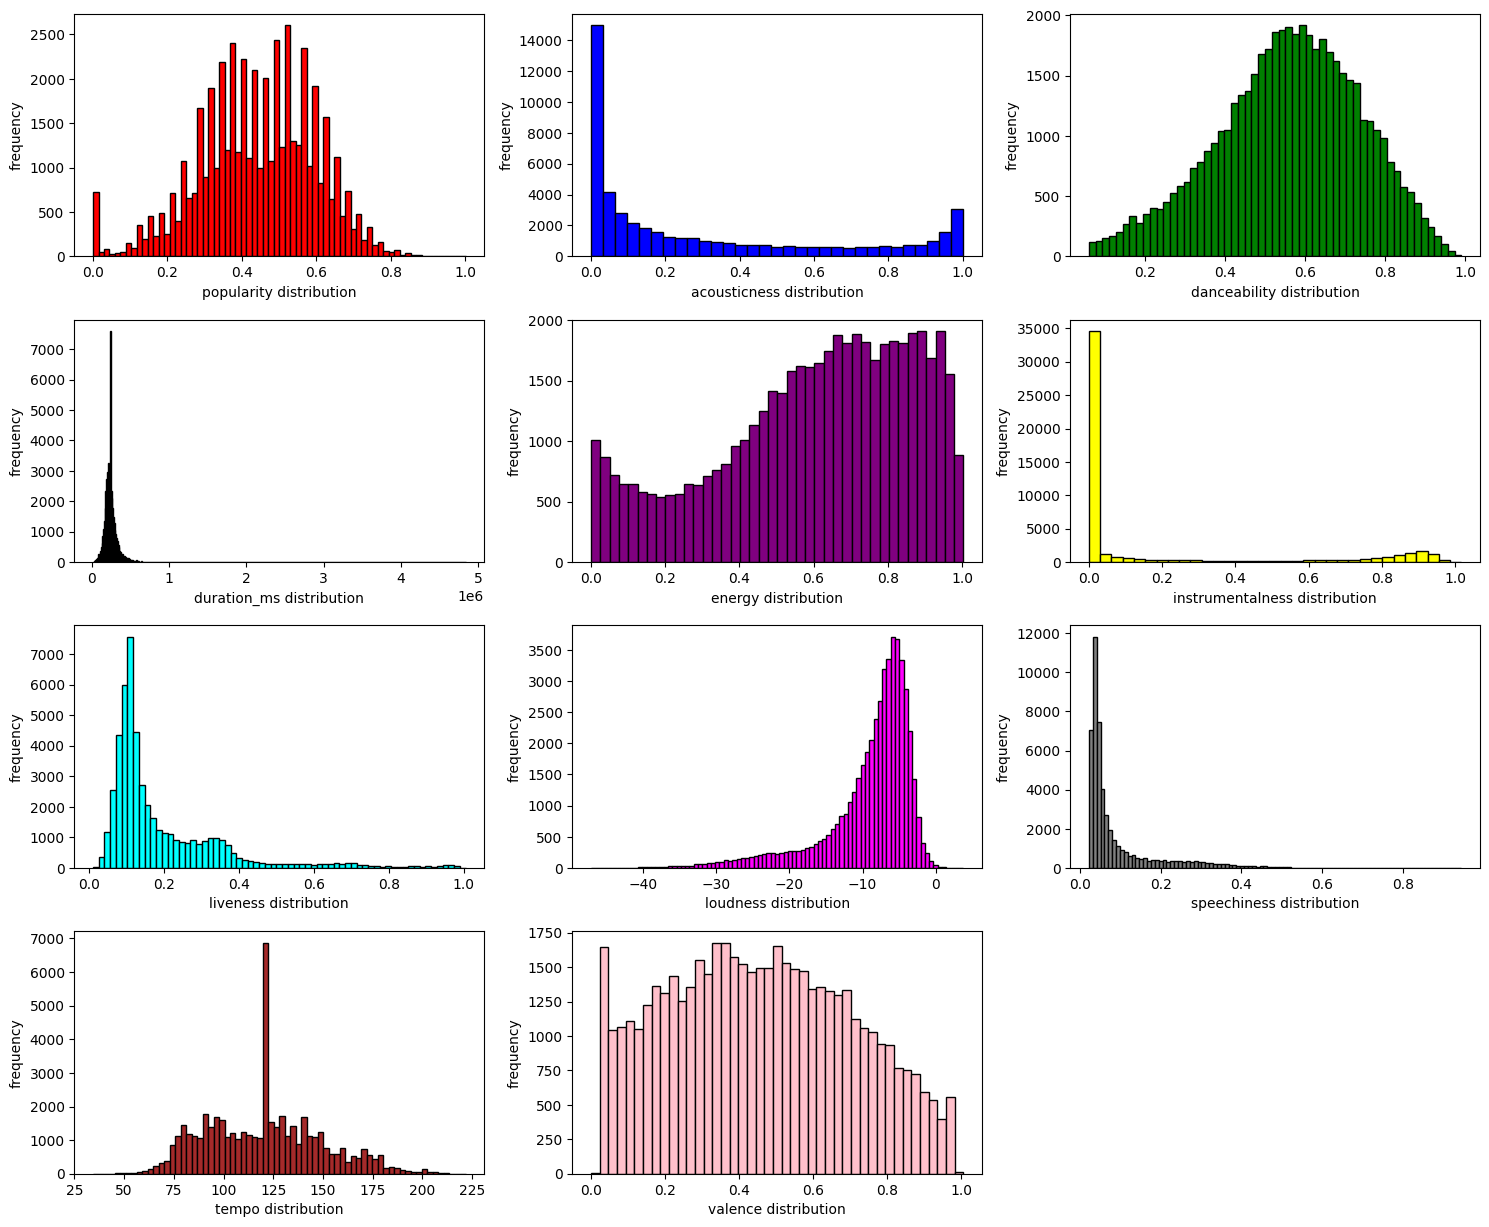

In [14]:
def plot_freq_dist(predictor, dataframe, color: str = "red", ax=None):
    """
    data: 1d dataframe to plot on the graph
    """
    data = dataframe[predictor]
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data)/data_size**(1./3)

    # define number of bins with accordance to the appropriate size 
    bins = np.arange(data.min(), data.max() + w, w, dtype=float)

    if ax is None:
        ax = plt.gca()
    ax.hist(data, color=color, edgecolor="black", bins=bins) 
    ax.set_xlabel("{} distribution".format(predictor))
    ax.set_ylabel("frequency")


predictors = ["popularity", "acousticness", "danceability", 
              "duration_ms", "energy", "instrumentalness", 
              "liveness", "loudness", "speechiness", 
              "tempo", "valence"]

colors = ['red', 'blue', 'green', 'orange', 'purple',
          'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'teal', 'lavender']

num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, predictor in enumerate(predictors):
    row_index = i // num_cols
    col_index = i % num_cols
    plot_freq_dist(predictor, dataframe=df, color=colors[i], ax=axes[row_index, col_index])

for i in range(len(predictors), num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

In [15]:
df.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [16]:
df['mode'] = df['mode'].astype('category')
df['key'] = df['key'].astype('category')

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['mode', 'key'])
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,32894.0,Röyksopp,Röyksopp's Night Out,0.27,0.00468,0.652,245503.541466,0.941,0.79200,0.115,...,False,False,False,False,False,False,False,False,False,False
1,46652.0,Thievery Corporation,The Shining Path,0.31,0.01270,0.622,218293.000000,0.890,0.95000,0.124,...,False,False,False,True,False,False,False,False,False,False
2,30097.0,Dillon Francis,Hurricane,0.28,0.00306,0.620,215613.000000,0.755,0.01180,0.534,...,False,False,False,False,False,False,False,False,False,True
3,62177.0,Dubloadz,Nitro,0.34,0.02540,0.774,166875.000000,0.700,0.00253,0.157,...,False,False,True,False,False,False,False,False,False,False
4,24907.0,What So Not,Divide & Conquer,0.32,0.00465,0.638,222369.000000,0.587,0.90900,0.157,...,False,False,False,False,False,False,False,True,False,False


In [17]:
# avoiding dummy variable trap
df = df.drop(["mode_Minor", "key_G#"], axis=1)
df.columns.to_list()

['instance_id',
 'artist_name',
 'track_name',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'obtained_date',
 'valence',
 'music_genre',
 'mode_Major',
 'key_A',
 'key_A#',
 'key_B',
 'key_C',
 'key_C#',
 'key_D',
 'key_D#',
 'key_E',
 'key_F',
 'key_F#',
 'key_G']

In [18]:
df['instance_id'] = df['instance_id'].astype(int)
df['artist_name'] = df['artist_name'].astype(str)
df['track_name'] = df['track_name'].astype(str)

df['popularity'] = df['popularity'].astype(float)
df['acousticness'] = pd.to_numeric(df['acousticness'], errors='coerce')
df['danceability'] = pd.to_numeric(df['danceability'], errors='coerce')
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['energy'] = pd.to_numeric(df['energy'], errors='coerce')
df['instrumentalness'] = pd.to_numeric(df['instrumentalness'], errors='coerce')
df['liveness'] = pd.to_numeric(df['liveness'], errors='coerce')
df['loudness'] = pd.to_numeric(df['loudness'], errors='coerce')
df['speechiness'] = pd.to_numeric(df['speechiness'], errors='coerce')
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df['valence'] = pd.to_numeric(df['valence'], errors='coerce')

df['mode_Major'] = df['mode_Major'].astype(int)
df['key_A'] = df['key_A'].astype(int)
df['key_A#'] = df['key_A#'].astype(int)
df['key_B'] = df['key_B'].astype(int)
df['key_C'] = df['key_C'].astype(int)
df['key_C#'] = df['key_C#'].astype(int)
df['key_D'] = df['key_D'].astype(int)
df['key_D#'] = df['key_D#'].astype(int)
df['key_E'] = df['key_E'].astype(int)
df['key_F'] = df['key_F'].astype(int)
df['key_F#'] = df['key_F#'].astype(int)
df['key_G'] = df['key_G'].astype(int)

df.dropna()
df["duration_sec"] = (df["duration_ms"] / 1000).round(decimals=2)
df.reset_index()
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,duration_sec
0,32894,Röyksopp,Röyksopp's Night Out,0.27,0.00468,0.652,245503.541466,0.941,0.79200,0.115,...,0,0,0,0,0,0,0,0,0,245.50
1,46652,Thievery Corporation,The Shining Path,0.31,0.01270,0.622,218293.000000,0.890,0.95000,0.124,...,0,0,0,1,0,0,0,0,0,218.29
2,30097,Dillon Francis,Hurricane,0.28,0.00306,0.620,215613.000000,0.755,0.01180,0.534,...,0,0,0,0,0,0,0,0,0,215.61
3,62177,Dubloadz,Nitro,0.34,0.02540,0.774,166875.000000,0.700,0.00253,0.157,...,0,0,1,0,0,0,0,0,0,166.88
4,24907,What So Not,Divide & Conquer,0.32,0.00465,0.638,222369.000000,0.587,0.90900,0.157,...,0,0,0,0,0,0,0,1,0,222.37


*The category labels of the genres will need to be transformed into numerical labels.  

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['genre_label'] = encoder.fit_transform(df['music_genre'])
genre_label_mapping = {label: genre for label, genre in zip(encoder.transform(encoder.classes_), encoder.classes_)}

print(genre_label_mapping)

{0: 'Alternative', 1: 'Anime', 2: 'Blues', 3: 'Classical', 4: 'Country', 5: 'Electronic', 6: 'Hip-Hop', 7: 'Jazz', 8: 'Rap', 9: 'Rock'}


In [20]:
print(df["obtained_date"].unique())
# we dont need the instance_id and obtained_date for the analysis
df = df.drop(["instance_id"], axis=1)
df = df.drop(["obtained_date"], axis=1)

['4-Apr' '3-Apr' '5-Apr' '1-Apr' '0/4']


In [21]:
# convert duration from milliseconds to minutes and seconds
df['duration_minutes'] = df['duration_ms'] // 60000  # 1 minute = 60,000 milliseconds
df['duration_seconds'] = (df['duration_ms'] % 60000) // 1000  # 1 second = 1,000 milliseconds

# combine minutes and seconds into a single column with a formatted string
df['duration_formatted'] = df.apply(lambda row: f"{row['duration_minutes']}m {row['duration_seconds']}s", axis=1)


print(df.columns.to_list())
df.head()

['artist_name', 'track_name', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'music_genre', 'mode_Major', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'duration_sec', 'genre_label', 'duration_minutes', 'duration_seconds', 'duration_formatted']


,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,...,key_D#,key_E,key_F,key_F#,key_G,duration_sec,genre_label,duration_minutes,duration_seconds,duration_formatted
0,Röyksopp,Röyksopp's Night Out,0.27,0.00468,0.652,245503.541466,0.941,0.79200,0.115,-5.201,...,0,0,0,0,0,245.50,5,4.0,5.0,4.0m 5.0s
1,Thievery Corporation,The Shining Path,0.31,0.01270,0.622,218293.000000,0.890,0.95000,0.124,-7.043,...,0,0,0,0,0,218.29,5,3.0,38.0,3.0m 38.0s
2,Dillon Francis,Hurricane,0.28,0.00306,0.620,215613.000000,0.755,0.01180,0.534,-4.617,...,0,0,0,0,0,215.61,5,3.0,35.0,3.0m 35.0s
3,Dubloadz,Nitro,0.34,0.02540,0.774,166875.000000,0.700,0.00253,0.157,-4.498,...,0,0,0,0,0,166.88,5,2.0,46.0,2.0m 46.0s
4,What So Not,Divide & Conquer,0.32,0.00465,0.638,222369.000000,0.587,0.90900,0.157,-6.266,...,0,0,0,1,0,222.37,5,3.0,42.0,3.0m 42.0s


In [26]:
continous_predictors= ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_sec']

categorical_predictors = ['mode_Major', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G']

# 'genre_label', 'music_genre'
predictors_all = ["artist_name", "track_name"] + continous_predictors + categorical_predictors + ["genre_label", "music_genre"]
final_df = df[predictors_all]
final_df.to_csv('processed_dataset.csv')

Cleaned the dataset and saved it into the dataframe

---

### Let's start with PCA

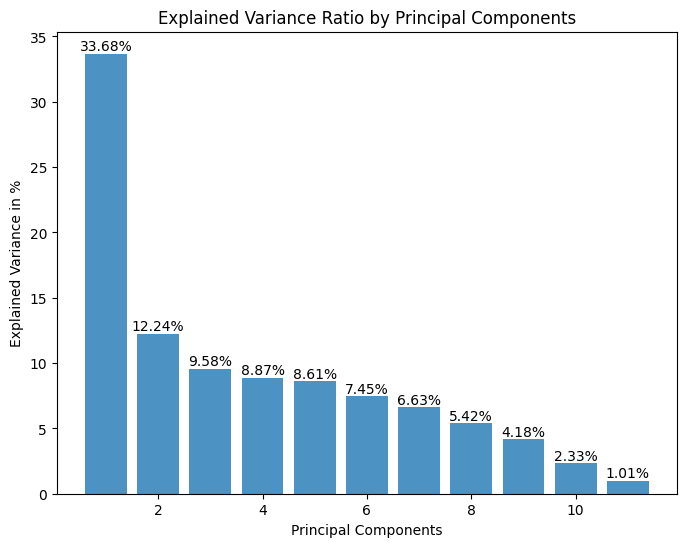

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_to_standardize = df[predictors]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_to_standardize)
df_standardized = pd.DataFrame(standardized_data, columns=df_to_standardize.columns)
df_standardized.columns = [col + "_stand" for col in df_to_standardize.columns]

pca = PCA(n_components=df_standardized.shape[1])
principalComponents = pca.fit_transform(df_standardized)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.8, align='center')

for bar, value in zip(bars, explained_variance):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.2f}%', ha='center', va='bottom')

plt.ylabel('Explained Variance in %')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

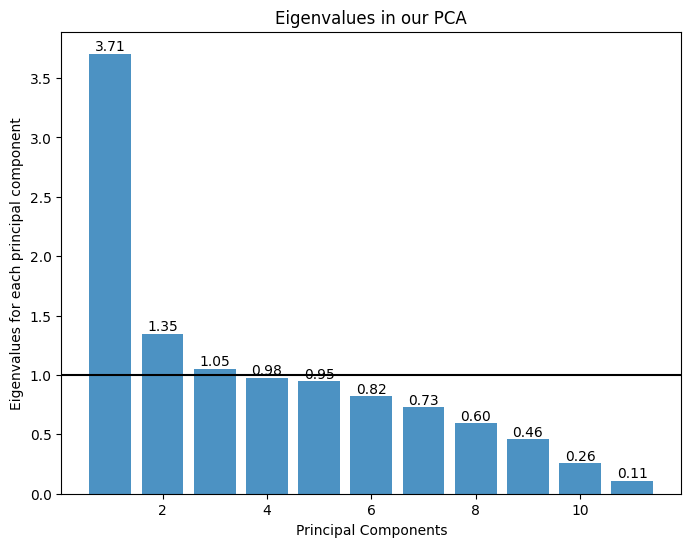

In [24]:
# eigenvalues
eigenvalues = pca.explained_variance_

plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center')
plt.axhline(y=1, color='k', linestyle='-')  # Add a horizontal line at y=0

for bar, value in zip(bars, eigenvalues):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.ylabel('Eigenvalues for each principal component')
plt.xlabel('Principal Components')
plt.title('Eigenvalues in our PCA')
plt.show()

In [25]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_standardized)
loadings = pca.components_
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component #1', 'principal component #2', 'principal component #3'])
loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading', 'PC1_loading'], index=df_standardized.columns)

print("Principal Component Loadings:")
loadingsDf

Principal Component Loadings:


,PC1_loading,PC2_loading,PC1_loading
popularity_stand,-0.252107,-0.372578,0.195752
acousticness_stand,0.423092,-0.228600,0.052891
danceability_stand,-0.302727,-0.455472,-0.074507
duration_ms_stand,0.123198,0.346579,0.187584
energy_stand,-0.437828,0.318988,-0.077872
instrumentalness_stand,0.338318,0.112164,-0.107112
liveness_stand,-0.084480,0.340877,0.599849
loudness_stand,-0.457076,0.182024,-0.065126
speechiness_stand,-0.174047,-0.282957,0.631637
tempo_stand,-0.146732,0.345531,-0.112042


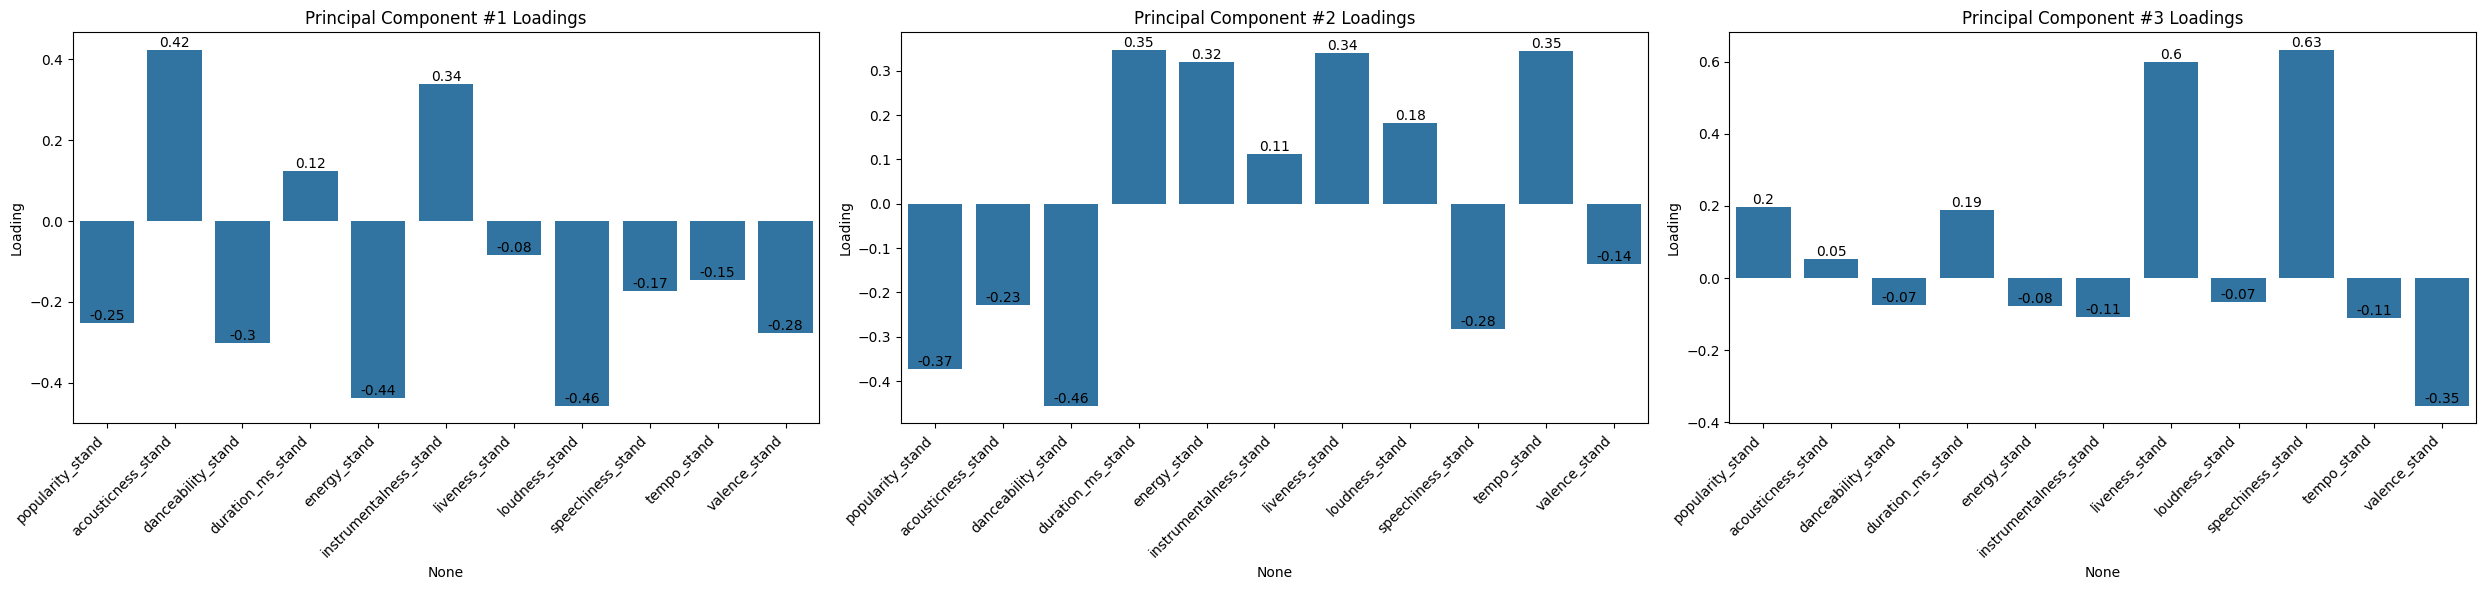

In [26]:
import seaborn as sns

loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading', 'PC3_loading'], index=df_standardized.columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

for i in range(3):
    sns.barplot(x=loadingsDf.index, y=f'PC{i+1}_loading', data=loadingsDf, ax=axes[i])
    axes[i].set_title(f'Principal Component #{i+1} Loadings')
    axes[i].set_ylabel('Loading')
    
    axes[i].set_xticks(range(len(loadingsDf.index)))
    axes[i].set_xticklabels(loadingsDf.index, rotation=45, ha='right')

    for idx, value in enumerate(loadingsDf[f'PC{i+1}_loading']):
        axes[i].text(idx, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [27]:
threshold = 0.35
sorted_loadings = loadingsDf.abs().sort_values(by=['PC1_loading', 'PC2_loading', 'PC3_loading'], ascending=False)

significant_variables_pc1 = sorted_loadings[sorted_loadings['PC1_loading'].abs() > threshold][['PC1_loading']].sort_values(by=['PC1_loading'], ascending=False)
significant_variables_pc2 = sorted_loadings[sorted_loadings['PC2_loading'].abs() > threshold][['PC2_loading']].sort_values(by=['PC2_loading'], ascending=False)
significant_variables_pc3 = sorted_loadings[sorted_loadings['PC3_loading'].abs() > threshold][['PC3_loading']].sort_values(by=['PC3_loading'], ascending=False)

print("Significant variables for PC1:")
print(significant_variables_pc1)
print("\nSignificant variables for PC2:")
print(significant_variables_pc2)
print("\nSignificant variables for PC3:")
print(significant_variables_pc3)

Significant variables for PC1:
                    PC1_loading
loudness_stand         0.457076
energy_stand           0.437828
acousticness_stand     0.423092

Significant variables for PC2:
                    PC2_loading
danceability_stand     0.455472
popularity_stand       0.372578

Significant variables for PC3:
                   PC3_loading
speechiness_stand     0.631637
liveness_stand        0.599849
valence_stand         0.353594
